# Playground

In [1]:
import scipy.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
mat_data = scipy.io.loadmat('/data/train_1/1_12_1.mat')

In [4]:
' :: '.join([str(mat_data['__header__']), str(mat_data['__version__']), str(mat_data['__globals__'])])

"b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Jul 16 01:24:55 2016' :: 1.0 :: []"

In [5]:
data = mat_data['dataStruct']
for i in [data, data[0], data[0][0][0], data[0][0][0][0]]:
    print((i.shape, i.size))


((1, 1), 1)
((1,), 1)
((240000, 16), 3840000)
((16,), 16)


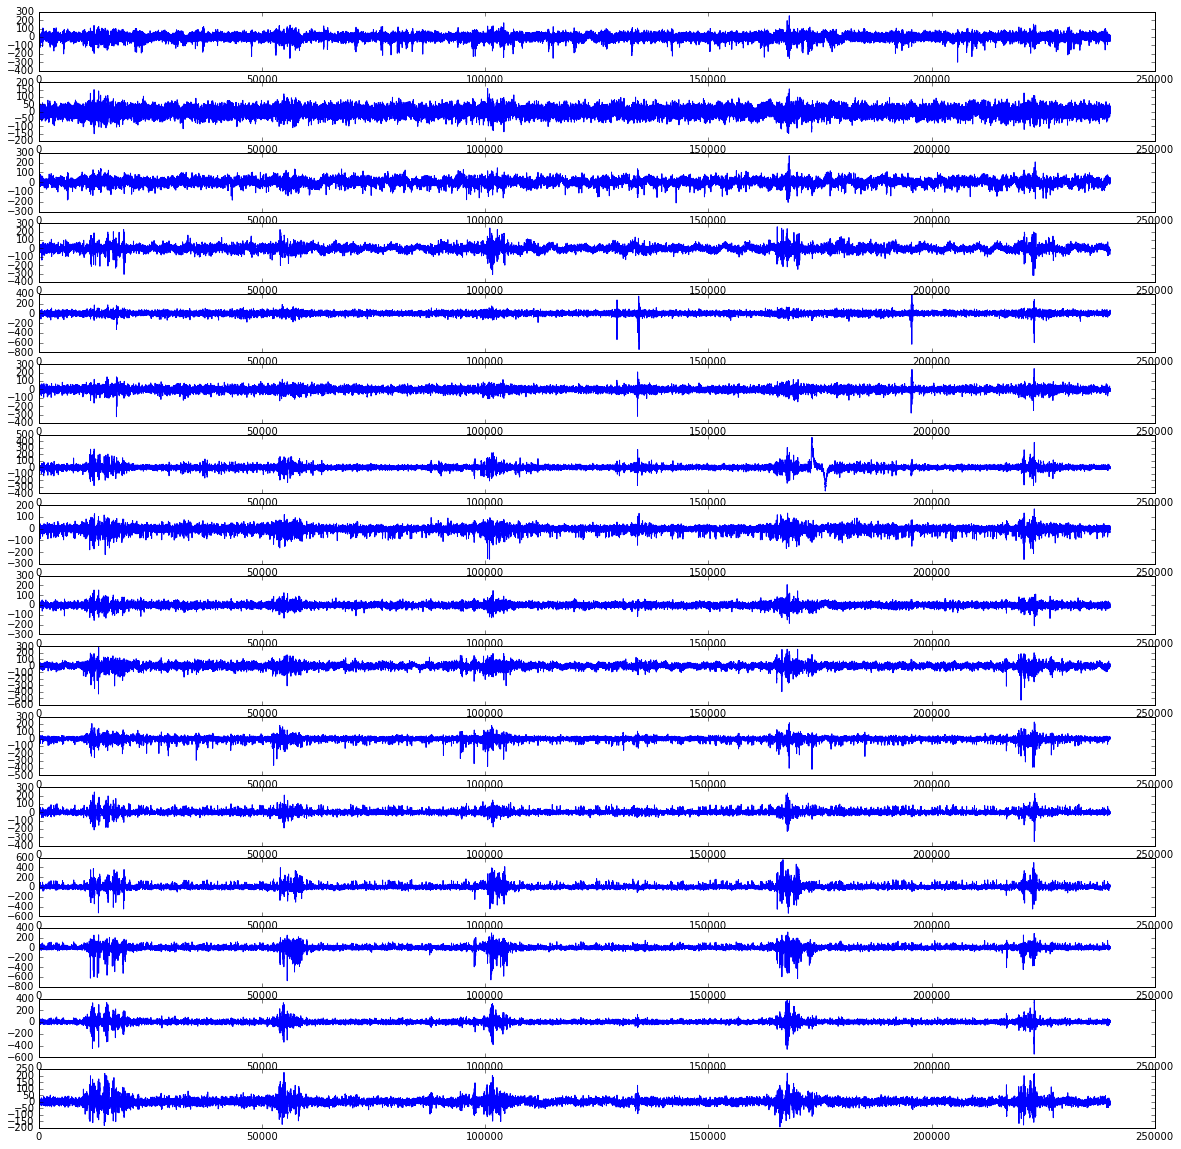

In [6]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
x = data[0][0][0]

count = 8
for i in range(count * 2):
    plt.subplot(16, 1, i + 1)
    plt.plot(x[:, i])

In [7]:
x_std = x.std(axis=1, dtype=np.float64)
print(x_std.shape, x_std.ndim)

x_split = np.array(np.split(x_std, 100))
print(x_split.shape)

x_mean = np.mean(x_split, axis=0)
print(x_mean.shape)

(240000,) 1
(100, 2400)
(2400,)


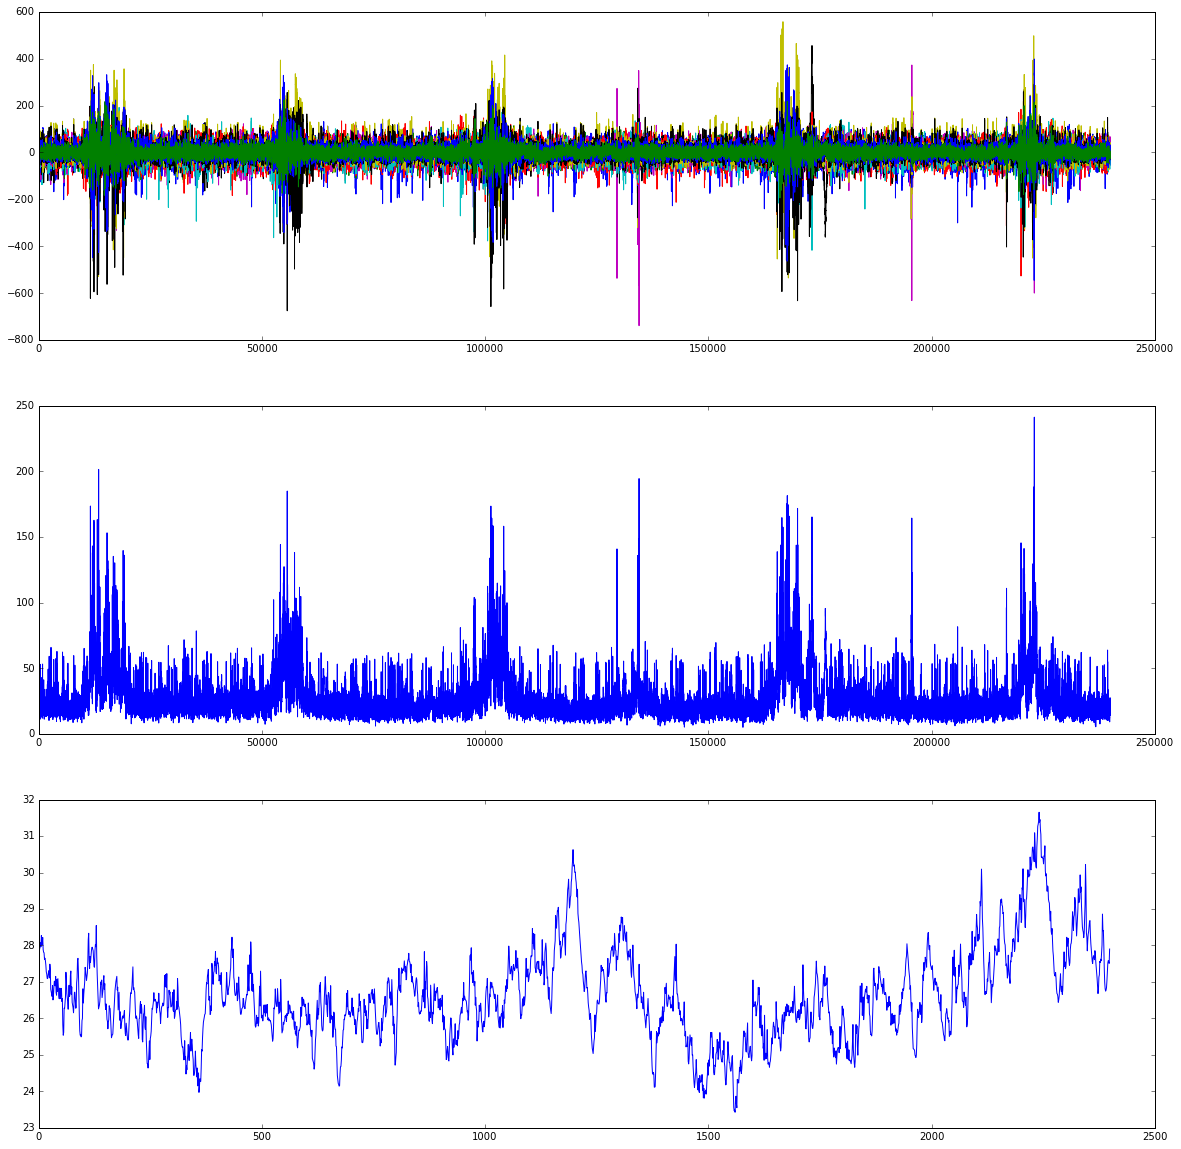

In [8]:
plt.subplot(3, 1, 1)
plt.plot(x)
plt.subplot(3, 1, 2)
plt.plot(x_std)
plt.subplot(3, 1, 3)
plt.plot(x_mean)

[('data', 'O'), ('iEEGsamplingRate', 'O'), ('nSamplesSegment', 'O'), ('channelIndices', 'O'), ('sequence', 'O')] (1,) object
float32


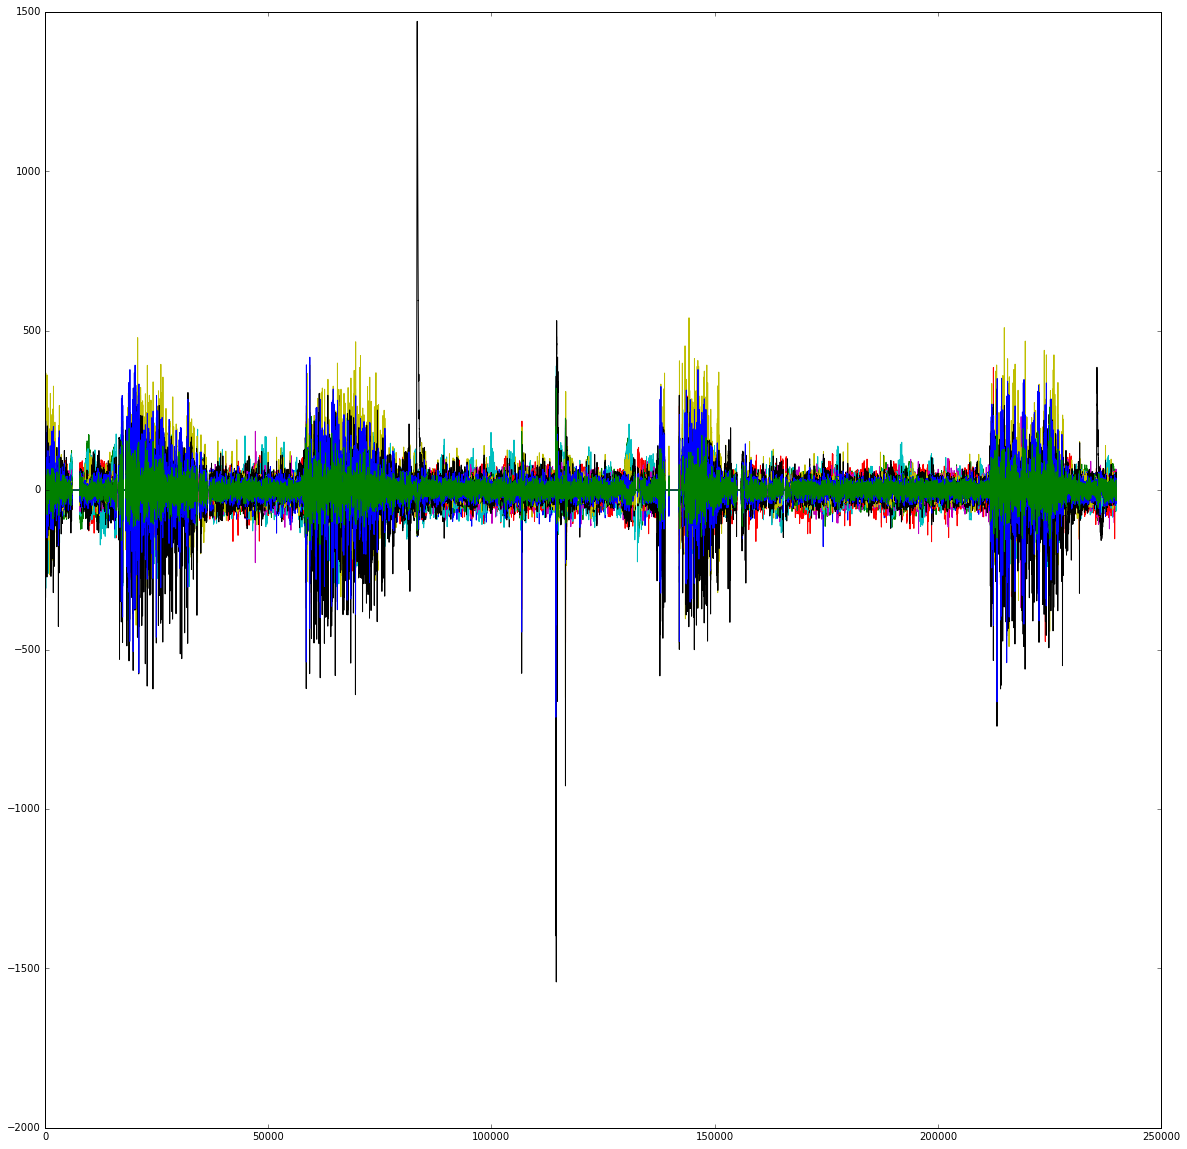

In [9]:
import scipy.io
mat_data = scipy.io.loadmat('/data/train_1/1_45_1.mat', verify_compressed_data_integrity=False)
data = mat_data['dataStruct']
print(data.dtype, data['sequence'][0].shape, data['sequence'].dtype)
x = data[0][0][0]
print(x.dtype)
plt.plot(x)

In [61]:
from scipy.fftpack import rfft

def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([rfft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    # X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
    #                 for i in range(0, len(x)-framesamp, hopsamp)])
    
    return X


In [121]:
mat_data = scipy.io.loadmat('/data/train_1/1_45_1.mat', verify_compressed_data_integrity=False)
data = mat_data['dataStruct']
print(data.dtype, data['sequence'][0].shape, data['sequence'].dtype)
x = data[0][0][0].transpose()
print(x.dtype)

x0 = x[0]

print(x0.shape)

x0_stft = stft(x0, 400, 1, 30)

print(x0_stft.shape)
print(x0_stft[0,:].shape)

x0_stft = x0_stft.reshape((1, x0_stft.shape[0] * x0_stft.shape[1]))[0:]
print('x0_stft shape:', x0_stft.shape)

x1_stft = stft(x0_stft[0:], 400, 1, 60)
print(x1_stft.shape)
print(x1_stft[0,:].shape)

x1_stft = x1_stft.reshape((1, x1_stft.shape[0] * x1_stft.shape[1]))
print(x1_stft.shape)

[('data', 'O'), ('iEEGsamplingRate', 'O'), ('nSamplesSegment', 'O'), ('channelIndices', 'O'), ('sequence', 'O')] (1,) object
float32
(240000,)
(20, 400)
(400,)
x0_stft shape: (1, 8000)
(0,)


IndexError: too many indices for array

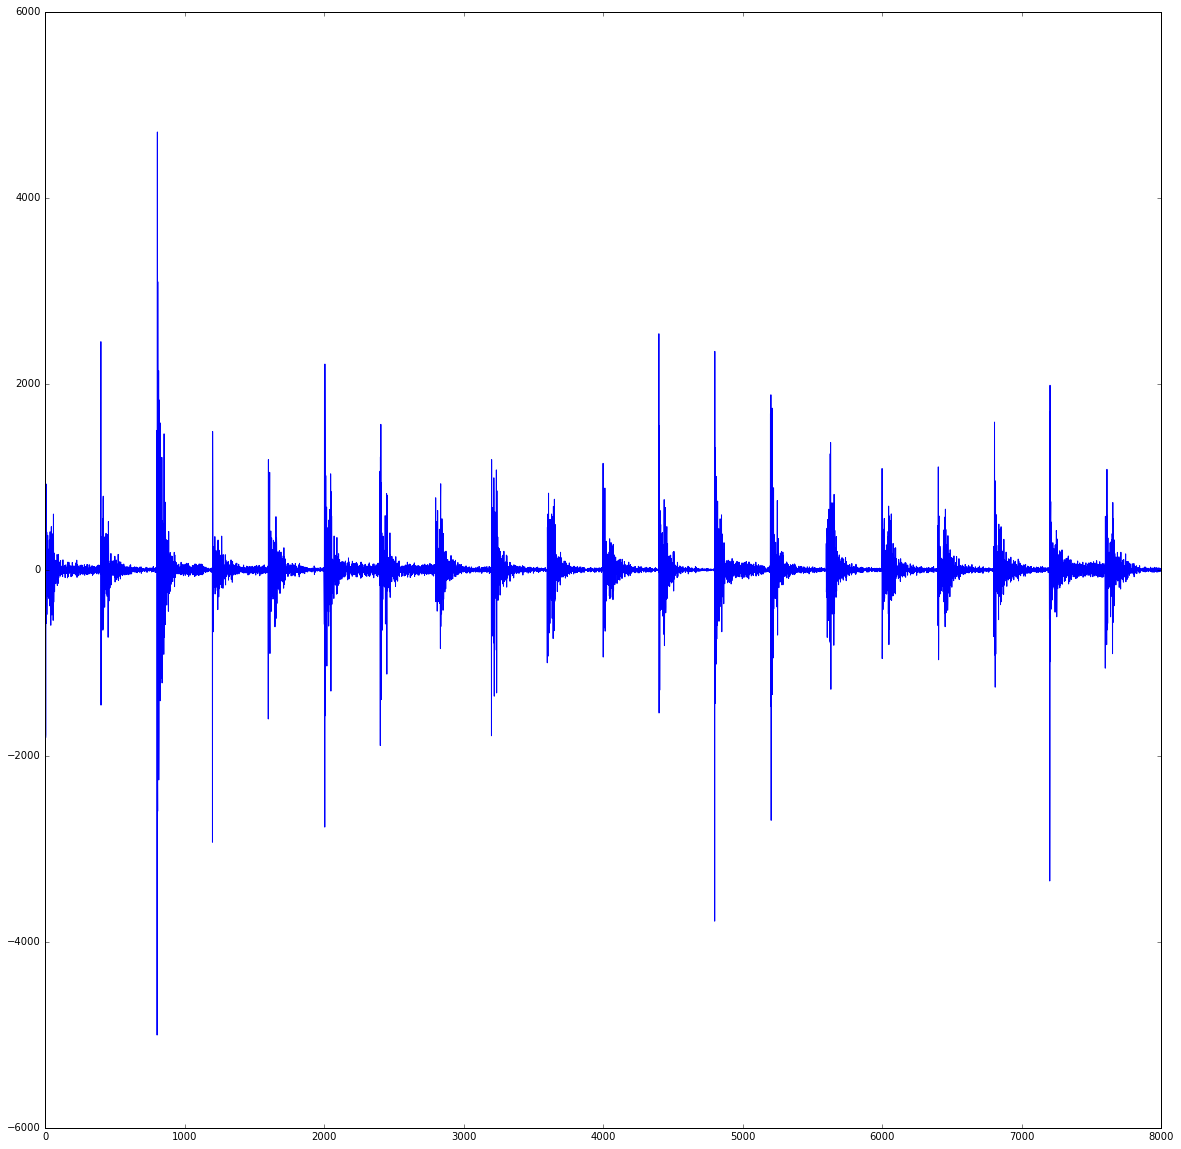

In [110]:
plt.plot(x0_stft[0,:])

F: [   0.        1.5625    3.125     4.6875    6.25      7.8125    9.375
   10.9375   12.5      14.0625   15.625    17.1875   18.75     20.3125
   21.875    23.4375   25.       26.5625   28.125    29.6875   31.25
   32.8125   34.375    35.9375   37.5      39.0625   40.625    42.1875
   43.75     45.3125   46.875    48.4375   50.       51.5625   53.125
   54.6875   56.25     57.8125   59.375    60.9375   62.5      64.0625
   65.625    67.1875   68.75     70.3125   71.875    73.4375   75.
   76.5625   78.125    79.6875   81.25     82.8125   84.375    85.9375
   87.5      89.0625   90.625    92.1875   93.75     95.3125   96.875
   98.4375  100.      101.5625  103.125   104.6875  106.25    107.8125
  109.375   110.9375  112.5     114.0625  115.625   117.1875  118.75
  120.3125  121.875   123.4375  125.      126.5625  128.125   129.6875
  131.25    132.8125  134.375   135.9375  137.5     139.0625  140.625
  142.1875  143.75    145.3125  146.875   148.4375  150.      151.5625
  153.125   154

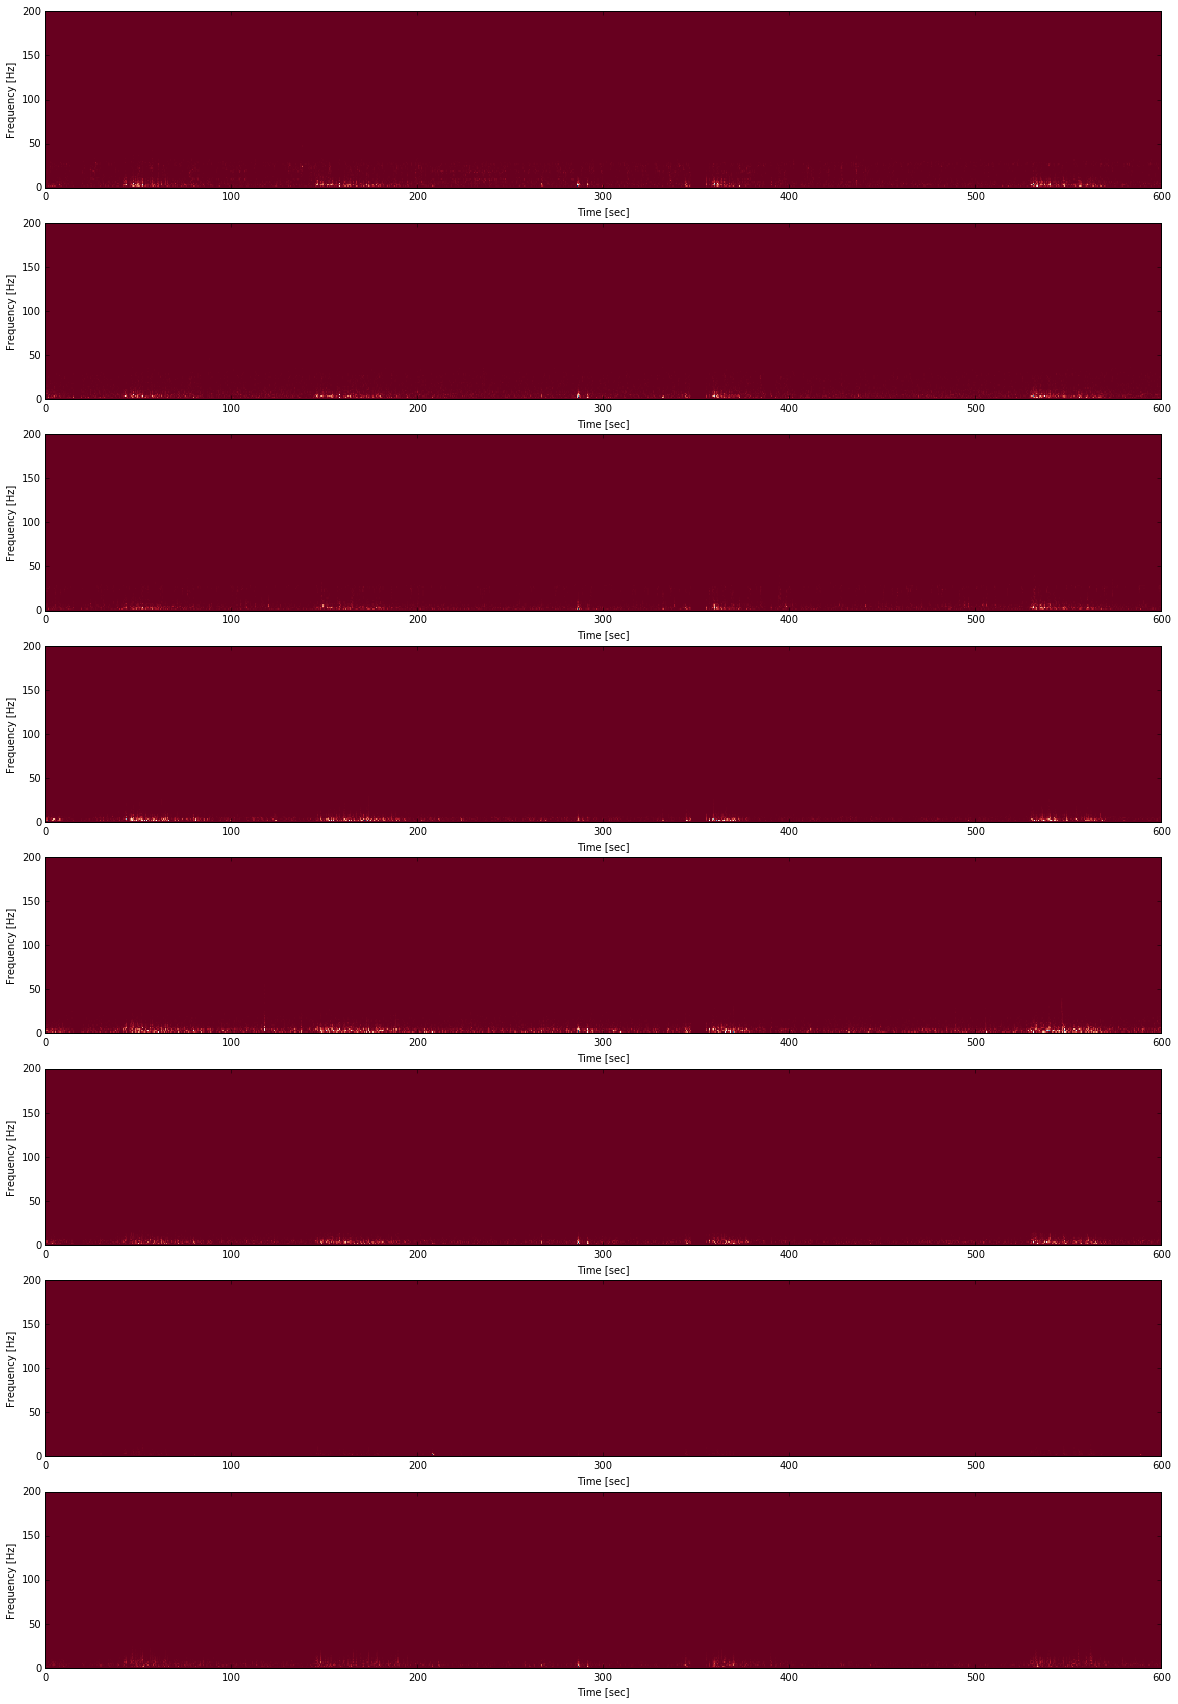

In [144]:
from scipy import signal

matplotlib.rcParams['figure.figsize'] = (20.0, 60.0)

fs = 400
x = data[0][0][0]

for i in range(8):
    plt.subplot(16, 1, i + 1)
    f, t, Sxx = signal.spectrogram(x[:, i], fs)

    # print('i:', i, 'f shape:', f.shape, 't shape:', t.shape, 'Sxx shape:', Sxx.shape)

    plt.pcolormesh(t, f, Sxx, cmap='RdBu')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

print('F:', f)
print('T:', t)
print('Sxx:', Sxx)

plt.show()

In [164]:
import sklearn.preprocessing

def fft(time_data):
    return np.log10(1e-4 + np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))

x = data[0][0][0]
x0 = x
print(x0.shape)

%time x_fft = fft(x0)
print(x_fft.shape)


def freq_corr(fft_data):
    scaled = sklearn.preprocessing.scale(fft_data, axis=0)
    corr_matrix = np.corrcoef(scaled)
    eigenvalues = np.absolute(np.linalg.eig(corr_matrix)[0])
    eigenvalues.sort()
    corr_coefficients = upper_right_triangle(corr_matrix) # custom func
    return np.concatenate((corr_coefficients, eigenvalues))

x_corr = freq_corr(x_fft)

(240000, 16)
CPU times: user 170 ms, sys: 20 ms, total: 190 ms
Wall time: 182 ms
(240000, 8)


MemoryError: 

In [153]:
import scipy.io
import scipy

def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X


mat_data = scipy.io.loadmat('/train_1/1_45_1.mat', verify_compressed_data_integrity=False)
data = mat_data['dataStruct']
x = data[0][0][0].transpose()

stft(x[0], 400, 0.1, 0.5).shape

FileNotFoundError: [Errno 2] No such file or directory: '/train_1/1_45_1.mat'

In [36]:
# data = a numpy array containing the signal to be processed
# fs = a scalar which is the sampling frequency of the data
  
data = x[0]
fs = 400
fft_size = 200
overlap_fac = 0.5

hop_size = np.int32(np.floor(fft_size * (1-overlap_fac)))
pad_end_size = fft_size          # the last segment can overlap the end of the data array by no more than one window size
total_segments = np.int32(np.ceil(len(data) / np.float32(hop_size)))
t_max = len(data) / np.float32(fs)
 
window = np.hanning(fft_size)  # our half cosine window
inner_pad = np.zeros(fft_size) # the zeros which will be used to double each segment size
 
proc = np.concatenate((data, np.zeros(pad_end_size)))              # the data to process
result = np.empty((total_segments, fft_size), dtype=np.float32)    # space to hold the result
 
for i in range(total_segments):                       # for each segment
    current_hop = hop_size * i                        # figure out the current segment offset
    segment = proc[current_hop:current_hop+fft_size]  # get the current segment
    windowed = segment * window                       # multiply by the half cosine function
    padded = np.append(windowed, inner_pad)           # add 0s to double the length of the data
    spectrum = np.fft.fft(padded) / fft_size          # take the Fourier Transform and scale by the number of samples
    autopower = np.abs(spectrum * np.conj(spectrum))  # find the autopower spectrum
    result[i, :] = autopower[:fft_size]               # append to the results array

    
result = 20 * np.log10(result)          # scale to db
result = np.clip(result, -40, 200)    # clip values

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log10


(16, 16) 256
X shape: (16, 16)
(16, 16) 256
X shape: (16, 32)
(16, 16) 256
X shape: (16, 48)
(16, 16) 256
X shape: (16, 64)


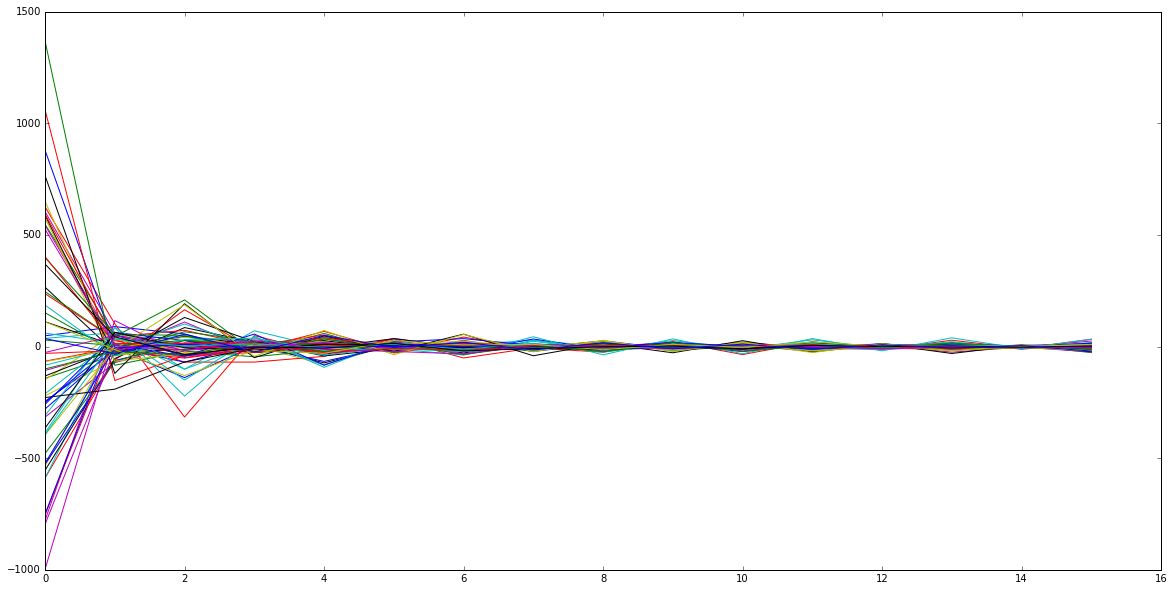

In [13]:
from scipy.fftpack import rfft

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

n = 16
n2 = 256

mat_data = scipy.io.loadmat('/train_1/1_1_0.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = x_fft
print('X shape:', X.shape)

# plt.subplot(2, 2, 1)
# plt.plot(x_fft)

mat_data = scipy.io.loadmat('/train_1/1_1_1.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = np.column_stack([X, x_fft])
print('X shape:', X.shape)

# plt.subplot(2, 2, 2)
# plt.plot(x_fft)

mat_data = scipy.io.loadmat('/train_1/1_2_0.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = np.column_stack([X, x_fft])
print('X shape:', X.shape)

# plt.subplot(2, 2, 3)
# plt.plot(x_fft)

mat_data = scipy.io.loadmat('/train_1/1_2_1.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = np.column_stack([X, x_fft])
print('X shape:', X.shape)

# plt.subplot(2, 2, 4)
# plt.plot(x_fft)

plt.plot(X)

In [ ]:
import itertools

from scipy import signal


sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

correlations = [
    signal.correlate(X[a], X[b], mode='same')
    for (a, b) in itertools.combinations(range(16), 2)
]
max_corr = np.maximum(*correlations)

In [15]:
# Cross correlation
N = 400

def correlation_a_b(a, b, t, offset=0):
    
    if t < 0:
        return correlation_a_b(b, a, -t, offset)
    
    A = None
    for i in range(N - t):
        new_slice = a[offset + i: offset + i + t]
        A = np.vstack([A, new_slice]) if A is not None else new_slice
        
    return np.sum(b[offset: offset + t] * A) * 1 / (N - t)

def cross_correlation(a, b):
    max_correlations = []
    for offset in range(0, 10 * 60 * 400, 400):
        correlations = []
        for t in np.arange(-.5, .5, 0.1):
            t = int(round(N * t))
            correlations.append(correlation_a_b(a, b, t, offset))

        max_correlations.append(max(correlations))
    
    return max_correlations

%time corr = cross_correlation(X[0], X[1])
len(corr)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# NIH Seizure

In [1]:
base = '/train_1/'
base_tests = '/test_1/'

Load the Data Scientist weapons

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

### Create some usefull methods

In [3]:
# Saves the data to a CSV file
def delete_content(file):
    with open(file, "w"):
        pass
# delete_content('train_1.csv')
# np.savetxt('train_1.csv', rows, fmt='%10.8f', delimiter=',')

In [4]:
def get_class_from_name(name):
    """
    Gets the class from the file name.
    
    The class is defined by the last number written in the file name.
    For example:
    
    Input: ".../1_1_1.mat"
    Output: 1.0
    
    Input: ".../1_1_0.mat"
    Output: 0.0
    """
    try:
        return float(name[-5])
    except:
        return 0.0

assert get_class_from_name('/train_1/1_1_0.mat') == 0.0
assert get_class_from_name('/train_1/1_1_1.mat') == 1.0

In [15]:
from scipy.fftpack import rfft


def get_X_files_and_y(base_dir, train_samples=600):
    ignored_files = ['.DS_Store', '1_45_1.mat']

    X_files = np.array([])
    y = np.array([])

    for i, filename in enumerate(os.listdir(base_dir)):
        if filename in ignored_files:
            continue

        X_files = np.append(X_files, str(filename))
        y = np.append(y, get_class_from_name(filename))  # The number of readings

        if i >= train_samples:
            break
    
    return X_files, y


def get_X_from_files(base_dir, files, show_progress=True):
    """
    Given a list of filenames, returns the Standard deviation of the content of each file as a row.
    """
    X = None
    n = 128

    total_files = len(files)

    for i, filename in enumerate(files):
        if show_progress and i % int(total_files / 10) == 0:
            print(u'%{}: Loading file {}'.format(int(i * 100 / total_files), filename))

        try:
            mat_data = scipy.io.loadmat(''.join([base_dir, filename]))
        except ValueError as ex:
            print(u'Error loading MAT file {}: {}'.format(filename, str(ex)))
            continue

        data = mat_data['dataStruct'][0][0][0]
        x_fft = rfft(data, n=n, axis=0)

        X = np.vstack([X, x_fft]) if X is not None else x_fft
    
    return X

In [9]:
# Utility function to report best scores
from operator import itemgetter

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

## Load the files and calculate their Standar deviation

Get the file names from the train folder and separates the files into training sets.

This will help to perform the `cross-validation` algorithm with these datasets.

In [11]:
import os

from sklearn.cross_validation import train_test_split
    
X_files, y = get_X_files_and_y(base, train_samples=200)
X_train_files, X_test_files, y_train, y_test = train_test_split(X_files, y, test_size=0.33, random_state=42)

Get the `X_train` and `X_test` data from the files.

The `y_train` and `y_test` will match the X sets sinces they were loaded in order.

In [16]:
%time X_train = get_X_from_files(base_dir=base, files=X_train_files)
%time X_test = get_X_from_files(base_dir=base, files=X_test_files)
print(u'X_train shape: {} - y_train shape: {}'.format(X_train.shape, y_train.shape))
print(u'X_test shape: {} - y_test shape: {}'.format(X_test.shape, y_test.shape))

%0: Loading file 1_856_0.mat
%9: Loading file 1_999_0.mat
%19: Loading file 1_91_1.mat
%29: Loading file 1_900_0.mat
%38: Loading file 1_916_0.mat
%48: Loading file 1_970_0.mat
%58: Loading file 1_920_0.mat
%67: Loading file 1_907_0.mat
%77: Loading file 1_932_0.mat
%87: Loading file 1_806_0.mat
%97: Loading file 1_904_0.mat
CPU times: user 8.46 s, sys: 3.38 s, total: 11.8 s
Wall time: 15.4 s
%0: Loading file 1_971_0.mat
%8: Loading file 1_94_1.mat
%17: Loading file 1_835_0.mat
%26: Loading file 1_960_0.mat
%35: Loading file 1_947_0.mat
%44: Loading file 1_8_1.mat
%53: Loading file 1_80_1.mat
%62: Loading file 1_924_0.mat
%71: Loading file 1_817_0.mat
%80: Loading file 1_98_1.mat
%89: Loading file 1_83_0.mat
%98: Loading file 1_928_0.mat
CPU times: user 4.88 s, sys: 1.22 s, total: 6.1 s
Wall time: 7.49 s
X_train shape: (17152, 16) - y_train shape: (134,)
X_test shape: (8576, 16) - y_test shape: (67,)


Create a GridSearch to find the best hyperparameters for the classifier

In [ ]:
from time import time

from sklearn import linear_model
from sklearn.grid_search import GridSearchCV

clf = linear_model.LogisticRegression(class_weight='balanced', n_jobs=-1)

param_grid = {
    'C': [0.001, 0.1, 1, 10, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
}

# run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=1)
# start = time()
# grid_search.fit(X_train, y_train)

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(grid_search.grid_scores_)))
# report(grid_search.grid_scores_)

Create and run the Linear Classifier

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(class_weight={1:1000, 0:1}, n_jobs=1, solver='lbfgs', C=1e5)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

In [ ]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced', probability=True)

In [ ]:
%time clf.fit(X_train, y_train)
clf.score(X_test, y_test), len([i for i in y_test if i == 0]), len([i for i in y_test if i == 1])

In [ ]:
clf

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%time y_pred = clf.predict(X_test)

print(u'Accuracy:', accuracy_score(y_test, y_pred))
print(u'Precision:', precision_score(y_test, y_pred))
print(u'Recall:', recall_score(y_test, y_pred))
print(u'F1 score:', f1_score(y_test, y_pred, average='binary'))

In [ ]:
%time y_pred = clf.predict_proba(X_test)

y_pred = y_pred[:, 0] * y_pred[:, 1]

import pandas

dtypes = [('File', 'S16'), ('Class', 'float32')]
data = np.array(list(zip(X_test_files, y_pred)), dtype=dtypes)

print(X_test_files[1:5])

data_frame = pandas.DataFrame(data)
data_frame['File'] = data_frame['File'].astype(str)

csv = data_frame.to_csv(float_format='%.5f', index=False).replace("b'", "'")

with open('train_1.csv', 'w') as f:
    f.write(csv)